In [1]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
import pandas as pd

### Import the HR data set 

In [7]:
url = 'https://drive.google.com/file/d/1DdwoOD_JfheYWG4xVFvYjEiqj2usZ52P/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(2)

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.5,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.0,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets


In [17]:
df.shape

(310, 17)

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [12]:
df.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

In [15]:
df['Zip'] = df['Zip'].astype(str)
df.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                   object
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

### Pull out the categorical variables and note the dimensions of the data set.

In [16]:
X = df.select_dtypes(include='O')
X.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [18]:
mca = prince.MCA()
coordinates = mca.fit_transform(X)
coordinates

,0,1
0,0.078752,0.161142
1,0.305480,0.183779
2,0.123434,0.272500
3,0.031078,0.079952
4,0.264714,0.073624
...,...,...
305,-0.009960,1.955869
306,-0.040827,1.610349
307,-0.009778,1.538143
308,-0.030894,1.731277


### Plot the coordinates of each resulting dimension.

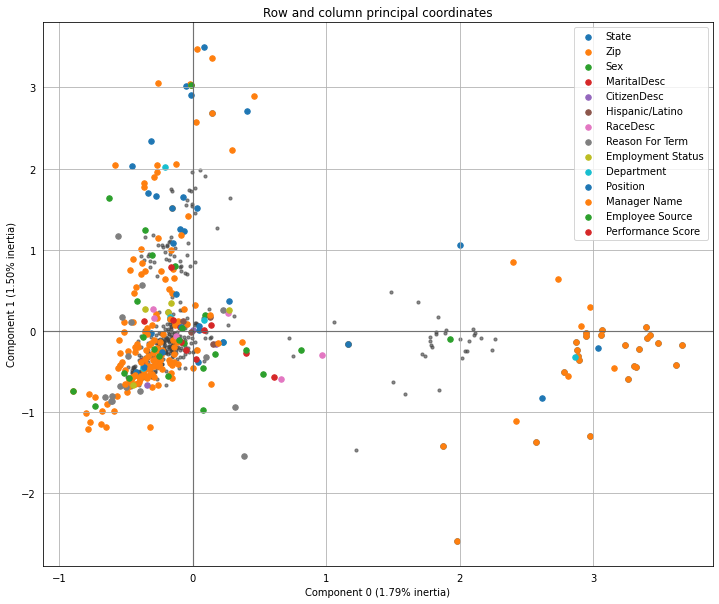

In [19]:
mca.plot_coordinates(X,figsize=(12,10))

### One hot encode the categorical features and note the change in dimensions in the data set.

In [20]:
X_dummies = pd.get_dummies(X)
X_dummies.shape

(310, 313)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [22]:
ca = prince.CA()
coordinates_dummies = ca.fit_transform(X_dummies)
coordinates_dummies

,0,1
0,0.086666,0.142149
1,0.313524,0.162650
2,0.131982,0.256187
3,0.038603,0.061797
4,0.273307,0.053052
...,...,...
305,-0.009650,1.949959
306,-0.040635,1.606083
307,-0.010278,1.540181
308,-0.031364,1.731744


### Plot the coordinates of each resulting dimension.

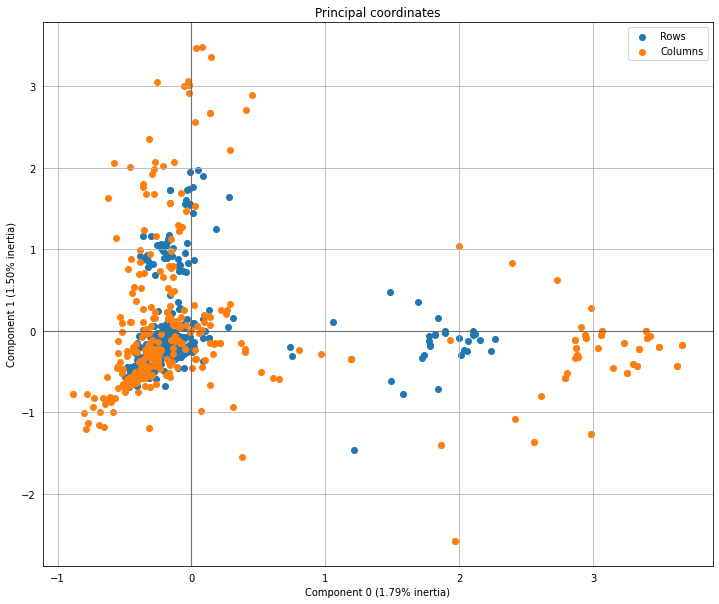

In [35]:
ca.plot_coordinates(X_dummies, show_col_labels=False, show_row_labels=False, figsize=(12, 10))

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [38]:
famd = prince.FAMD()
coordinates = famd.fit_transform(df)
coordinates

,0,1
0,0.742774,2.235116
1,-0.092820,0.334663
2,0.016977,-0.243442
3,-1.016941,-1.373341
4,-0.836179,-0.398497
...,...,...
305,1.145217,-2.072879
306,0.940103,-2.134678
307,0.738220,-2.066038
308,0.651168,-2.309922


### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

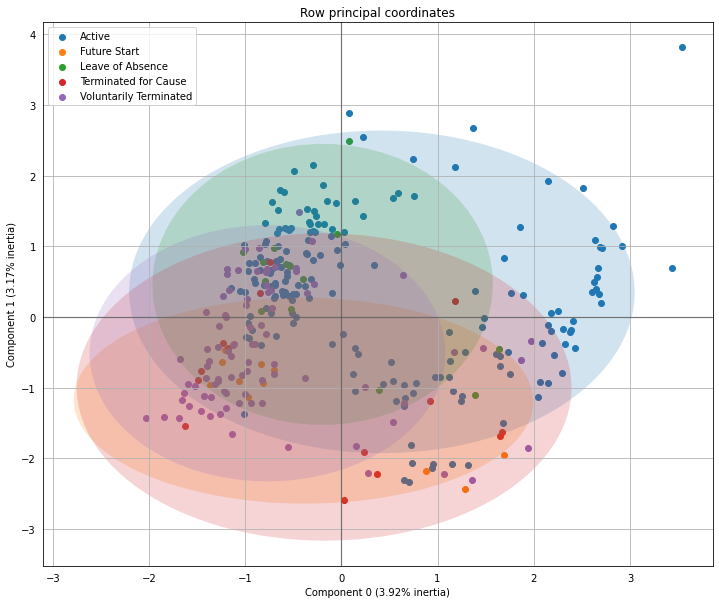

In [41]:
famd.plot_row_coordinates(df, figsize=(12, 10), color_labels=df["Employment Status"])